# IS597MLC: Machine Learning Pipeline

### Student Name:   Akash Das
### Net ID:  akashd4

## Data set 

This dataset offers a detailed account of 100,000 orders from the Olist Store, recorded between 2016 and 2018 across multiple Brazilian marketplaces. It includes a wide range of order-related data, such as status, pricing, payment and delivery performance, along with information on customer location, product attributes, and reviews. Notably, the dataset is anonymized to protect commercial confidentiality, with company and partner names in the review texts replaced with names from the "Game of Thrones" series, preserving data integrity while maintaining privacy.

Additionally, the dataset features a geolocation component that maps Brazilian zip codes to latitude and longitude coordinates, enriching the dataset's utility for spatial analysis. Olist also provides a Marketing Funnel Dataset, which can be integrated with the main dataset to offer insights from a marketing perspective, enhancing the understanding of customer engagement and marketing strategy effectiveness. Detailed instructions for dataset integration and use are available, facilitating comprehensive analysis for users. The dataset is available on Kaggle ( https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data )

## Dataset Overview

* **Dataset Info**: 
    * **Name**: Brazilian E-Commerce Public Dataset by Olist
    * **Provider**: Olist Store, Andre Sionek, Dabague Francisco,Magioli
    * **Source Link**: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

* **Data Description**:
    * **Data Size**: Information on 100,000 orders from 2016 to 2018.
    * **Number of Instances & Attributes**:
        * The dataset contains detailed data for over 100,000 e-commerce orders.
        * Attributes span multiple dimensions of customer and order details.
    
* **Detailed Info for Each Attribute**:
    * **customer_id**: Key to orders dataset, unique per order.
    * **customer_unique_id**: Unique identifier for a customer.
    * **customer_zip_code_prefix**: First five digits of customer's zip code.
    * **customer_city**: Name of the city the customer resides in.
    * **customer_state**: State where the customer resides.
    * **order_status**: Status of the order (e.g., delivered, shipped).
    * **order_purchase_timestamp**: Timestamp when the purchase was made.
    * **order_approved_at**: Timestamp when payment was approved.
    * **order_delivered_carrier_date**: When the order was handed to the logistic partner.
    * **order_delivered_customer_date**: Actual delivery date to the customer.
    * **order_estimated_delivery_date**: Estimated delivery date informed at purchase.
    * **review_id**: Unique identifier for the review.
    * **order_id**: Unique identifier for the order.
    * **review_score**: Customer satisfaction score, from 1 to 5.
    * **review_comment_title**: Title of customer's review, in Portuguese.
    * **review_comment_message**: Message of customer's review, in Portuguese.
    * **review_creation_date**: Date the satisfaction survey was sent.
    * **review_answer_timestamp**: Timestamp of survey answer.
    * **seller_id**: Seller's unique identifier.
    * **seller_zip_code_prefix**: First 5 digits of seller's zip code.
    * **seller_city**: Name of the city the seller is located in.
    * **seller_state**: State where the seller is located.
    * **geolocation_zip_code_prefix**: First 5 digits of zip code for geolocation data.
    * **geolocation_lat**: Geographic latitude.
    * **geolocation_lng**: Geographic longitude.
    * **geolocation_city**: Name of the city according to geolocation.
    * **geolocation_state**: State abbreviation according to geolocation.


## Dataset Architecture 

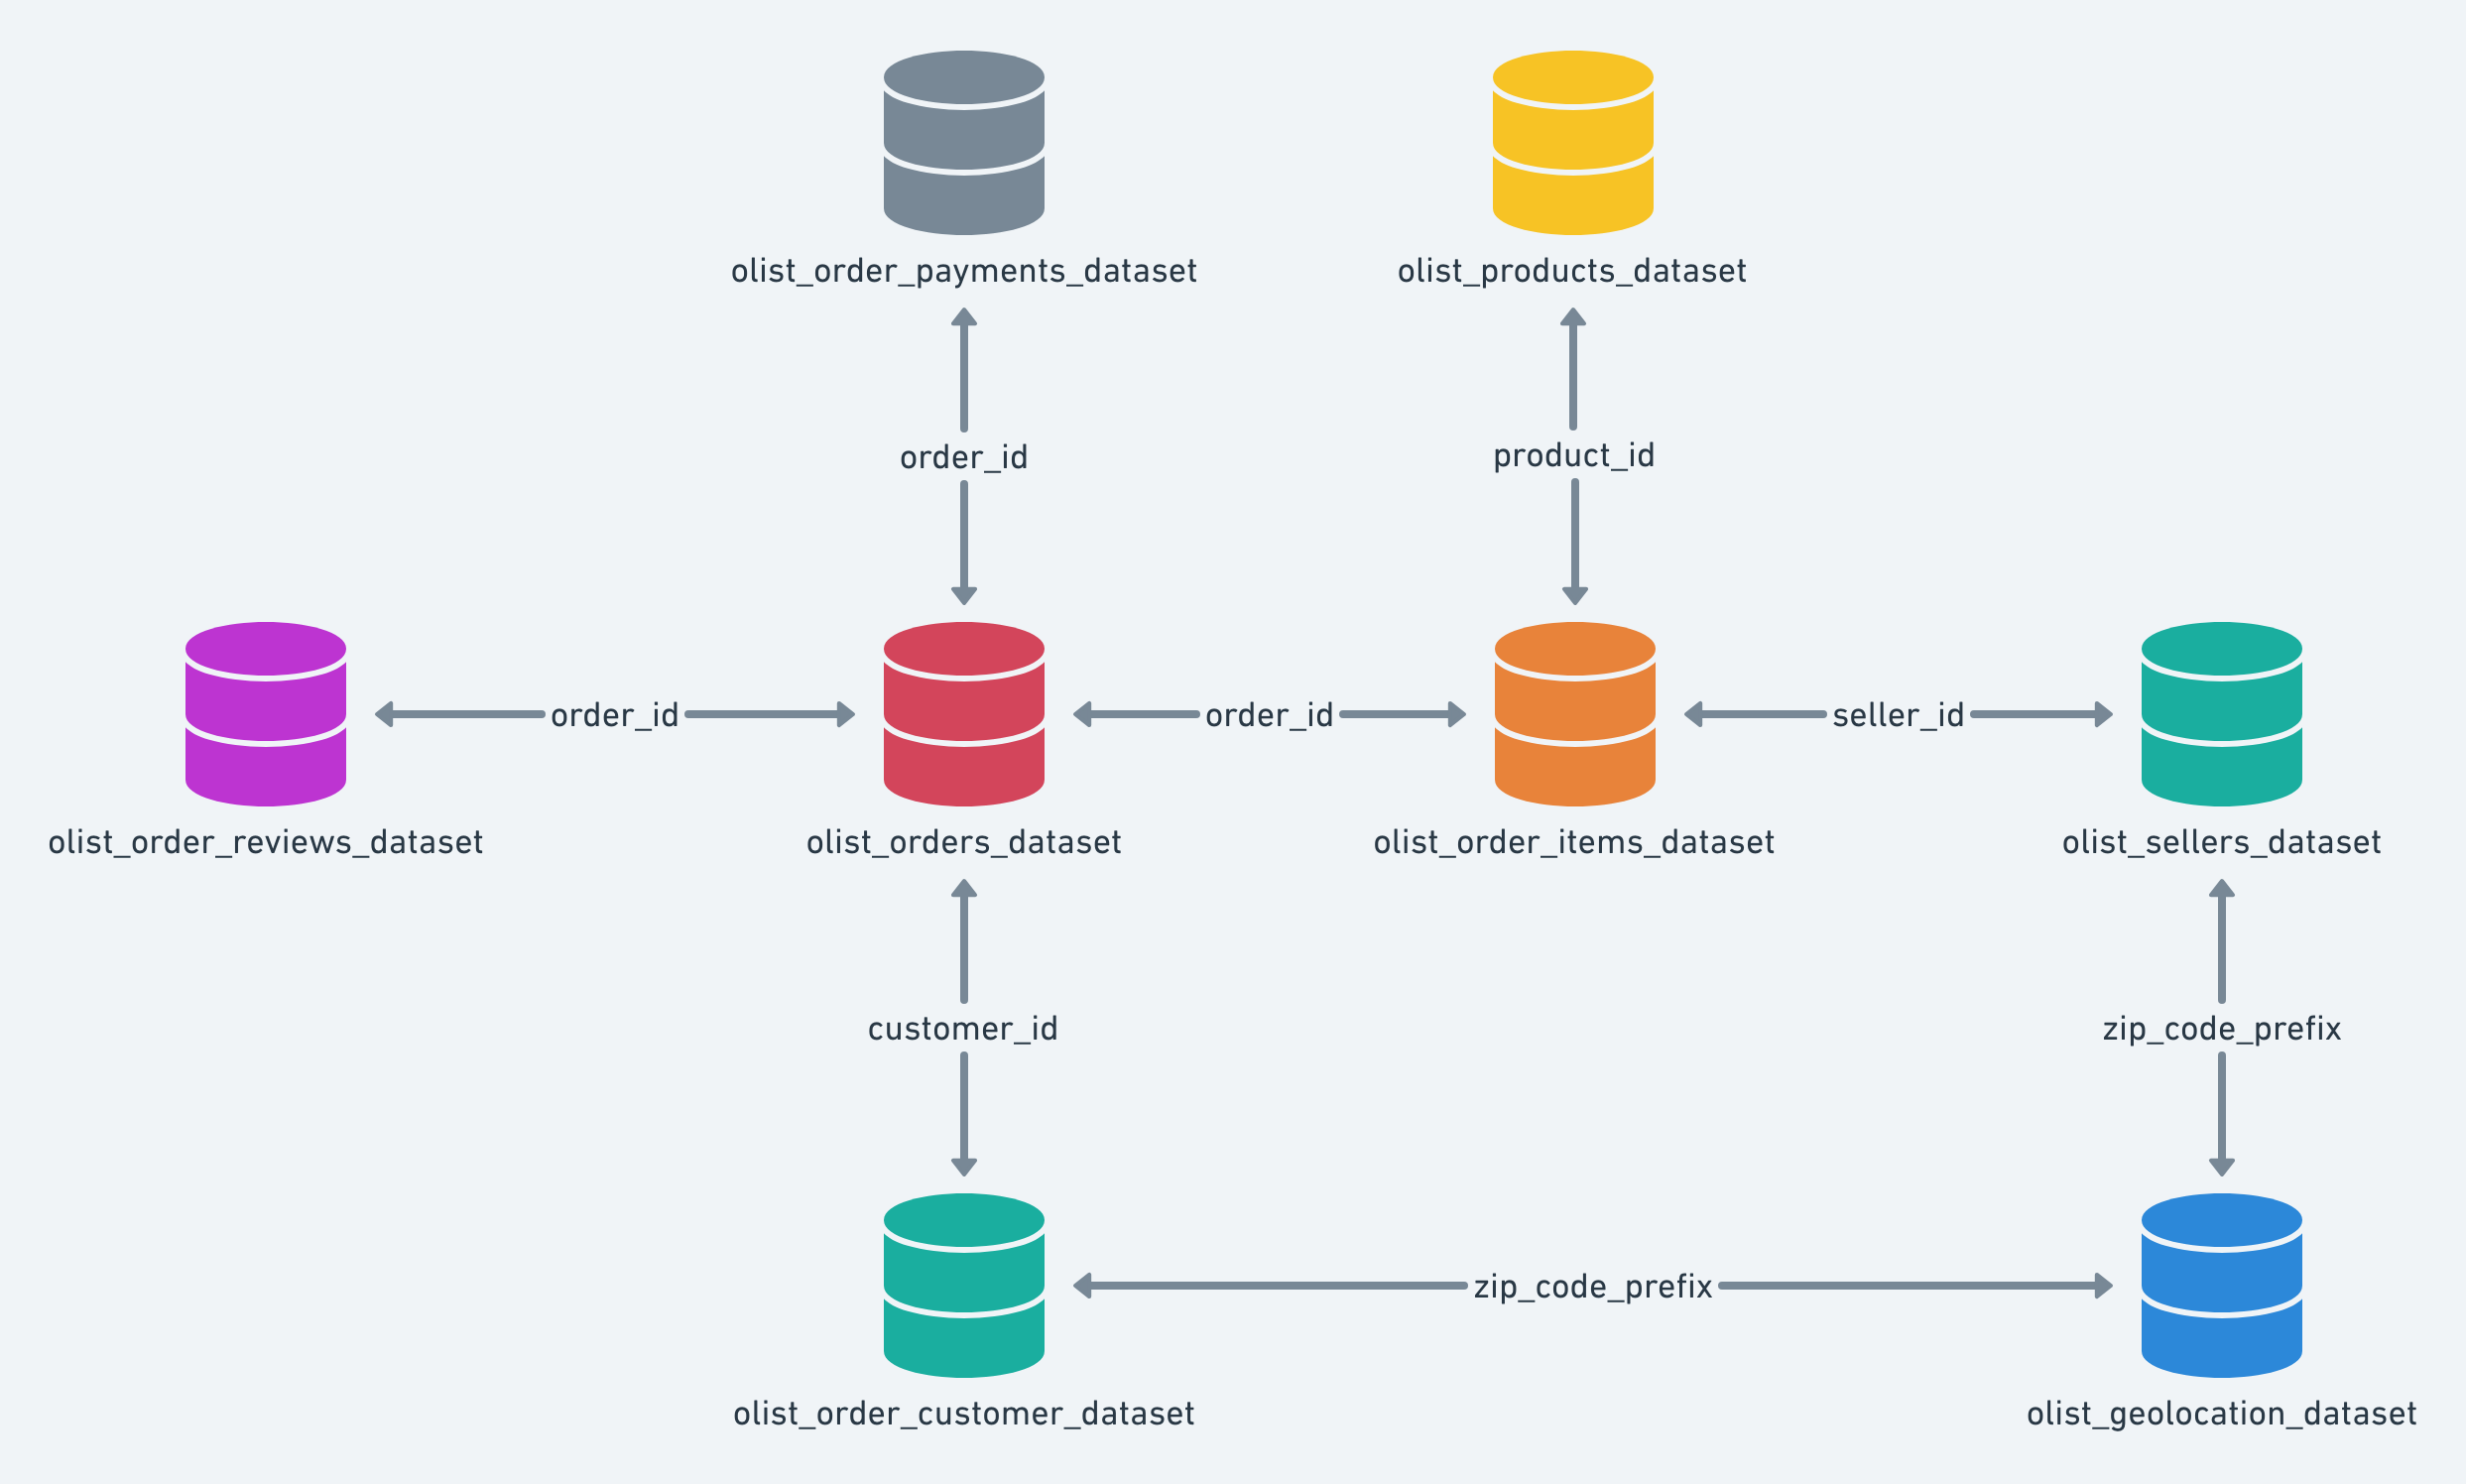

In [1]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.7 MB/s eta 0:00:00:00:01


In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.3 MB/s eta 0:00:00:00:0100:01


In [3]:
#Calling all the require import functions that we will be using for the machine learning pipeline, 
#The load_and_create_dataframes are present to import the unzipped files and to create the dataframes 
from import_data_final import load_and_create_dataframes
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/ec2-user/nltk_data...


In [4]:
#Calling the function from the import python file to parse the data and conver it to required dataframes 
dataset_path = './data'
print(f'***********Creating Dataframes*********\n')
dataframes = load_and_create_dataframes(dataset_path)

***********Creating Dataframes*********

DataFrame for customers created with shape (99441, 5)
DataFrame for order_items created with shape (112650, 7)
DataFrame for products created with shape (32951, 9)
DataFrame for sellers created with shape (3095, 4)
DataFrame for orders created with shape (99441, 8)
DataFrame for product_category_name_translation created with shape (71, 2)
DataFrame for order_reviews created with shape (99224, 7)
DataFrame for geolocation created with shape (1000163, 5)
DataFrame for order_payments created with shape (103886, 5)


In [5]:
#Converting dataframe names to a more readable format:
df_customers=dataframes['customers']
df_order_items=dataframes['order_items']
df_products=dataframes['products']
df_sellers=dataframes['sellers']
df_orders=dataframes['orders']
df_order_reviews=dataframes['order_reviews']
df_geolocation=dataframes['geolocation']
df_order_payments=dataframes['order_payments']
df_order_product_category_name_translation=dataframes['product_category_name_translation']

In [6]:
#Merging the dataset, running pandas import again as there is a scoping error
df= pd.merge(df_customers, df_orders, on="customer_id", how='inner')
df= df.merge(df_order_reviews, on="order_id", how='inner')
df= df.merge(df_order_items, on="order_id", how='inner')
df= df.merge(df_products, on="product_id", how='inner')
df= df.merge(df_order_payments, on="order_id", how='inner')
df= df.merge(df_sellers, on='seller_id', how='inner')
df= df.merge(df_order_product_category_name_translation, on='product_category_name', how='inner')
print(f'***********Merged Dataframes*********\n')
df[:10].head(5)

***********Merged Dataframes*********



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,15.0,40.0,1,credit_card,8,335.48,88303,itajai,SC,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,52.0,17.0,1,credit_card,7,157.73,8577,itaquaquecetuba,SP,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,51.0,28.0,1,credit_card,1,173.30,8577,itaquaquecetuba,SP,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort


In [7]:
#Confirming that there are no duplicates created post merge
df.duplicated().sum()

0

In [8]:
print(f'***********Information of Dataframes*********\n')
df.info()

***********Information of Dataframes*********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-nu

In [9]:
#Checking missing values in the final dataframe
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0


## Feature Engineering 

In this section, we focus on enhancing our dataset with new features that are specifically tailored to improve the analysis of e-commerce transactions. These features aim to provide deeper insights into customer behavior, order processing times, and overall transaction dynamics.

In [10]:
# Since the values of missing data are less in some columns, we will drop them directly
df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], inplace=True)



The dataset contains several columns with missing values. Most of these missing entries are few in number compared to the dataset's total entries. Therefore, it's practical to directly drop these rows from the dataset to maintain the integrity of our analysis.

In [11]:
# Displaying the count of missing values per column
df.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             99700
review_comment_message           65834
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght      

In [12]:
def product_category_class(x):
    '''
    Maps a specific product type to its general category. It uses a dictionary 'category_map' where keys are 
    general categories and values are lists of specific product types. The function checks which category 
    the product type 'x' belongs to. If found, it returns the category; otherwise, it returns 'Other'.
    '''
    # Mapping of general categories to specific product types
    category_map = {
        'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 
                      'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 
                      'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 
                      'furniture_mattress_and_upholstery'],
        'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 
                        'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 
                        'fixed_telephony', 'tablets_printing_image', 'computers', 
                        'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 
                        'signaling_and_security', 'security_and_services'],
        'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 
                    'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 
                    'baby', 'cool_stuff'],
        'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 
                          'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 
                          'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
        'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 
                          'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art'],
        'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
        'Food & Drinks': ['food_drink', 'drinks', 'food'],
        'Books & Stationery': ['books_general_interest', 'books_technical', 'books_imported', 'stationery'],
        'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 
                                    'industry_commerce_and_business', 'agro_industry_and_commerce']
    }

    # Returning the category if product type 'x' is found, otherwise return 'Other'
    for category, values in category_map.items():
        if x in values:
            return category
    return 'Other' 

# Using the DataFrame for a new column called product category
df['product_category'] = df['product_category_name_english'].apply(product_category_class)


In [13]:
#Understanding the distribution of the product category
print(f'*********** Product Category Distribution ***********\n')
df['product_category'].value_counts()

*********** Product Category Distribution ***********



product_category
Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: count, dtype: int64

In [14]:
# Calculating and adding a new column for total volume of each product in cubic centimeters
df['total_volume'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']

# Removing individual dimension columns to simplify the dataset
df.drop(columns=['product_length_cm', 'product_width_cm', 'product_height_cm'], inplace=True)


## Removal of Incorrect Installment Values

During our exploratory data analysis (EDA), we identified that some rows in the dataset have installment values recorded as zero. Since zero installments are not plausible under normal circumstances, we assume these entries might be errors or data input issues. To maintain the integrity and accuracy of our dataset, we will proceed to remove these rows. This ensures that further analyses and models are built on correct and meaningful data.


In [15]:
#Dropping the rows that have installments as zero
df = df[df['payment_installments'] != 0].reset_index(drop=True)

In [16]:
# Convert date-related columns to datetime format and handle errors by coercion

print(f'*********** Converting Date Columns to Datetime Format ***********\n')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'],errors='coerce')
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'],errors='coerce')
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'],errors='coerce')
df.dtypes

*********** Converting Date Columns to Datetime Format ***********



customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date                     object
review_answer_timestamp                  object
order_item_id                             int64
product_id                               object
seller_id                               

In [17]:
# Calculating the actual number of days from the order purchase date to the date the order was delivered to the customer
df['days_to_arrival'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [18]:
# Calculating the duration in days between the date the order was handed over to the carrier and the date it was delivered to the customer
df['days_to_shipping'] = (df['order_delivered_customer_date']- df['order_delivered_carrier_date']).dt.days

In [19]:
# Calculating the estimated shipping duration in days from the purchase date to the estimated delivery date
df['days_to_deliver_estimated'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days


In [20]:
# We will not be considering the data that was updated onto the carrier date later than when the customer has actually received the shipping
mask = (df['days_to_shipping'] < 0) & df['order_delivered_carrier_date'].notna() & df['order_delivered_customer_date'].notna()
df = df.drop(df[mask].index)

In [21]:
# Calculating the number of days it took for order to reach from seller to carrier
df['seller_carrier_status'] = (df['shipping_limit_date'] - df['order_delivered_carrier_date']).dt.days
#Calculating the status based on the time it took from seller to carrier
df['seller_carrier_status'] = np.where(df['seller_carrier_status'] >= 0, 'On-Time', 'Delayed')

In [22]:
# Difference between estimated delivery date and actual delivery date in days
df['carrier_to_customer_status'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
# We will categorize them as OnTime or Late
df['carrier_to_customer_status'] = np.where(df['carrier_to_customer_status'] >= 0, 'On-Time', 'Delayed')

In [23]:
# Dropping any such days that are beyond 60 since they can be considered as an outlier 
outliers = df[(df.days_to_deliver_estimated > 60) | (df.days_to_arrival > 60) | (df.days_to_shipping > 60)].index

df.drop(outliers, inplace= True)
df.reset_index(inplace= True, drop= True)

## Categorizing Delivery Metrics
This code segment categorizes delivery performance into predefined bins ranging from 'Very Good' to 'Very Poor'. The categories are based on days to estimated delivery, actual arrival, and shipping time, allowing for a structured analysis of delivery efficiency.

In [24]:

# Defining the bins and labels
bins = [-1, 7, 15, 24, 39, float('inf')]
labels = ['Very Good', 'Good', 'Neutral', 'Poor', 'Very Poor']

# Applying pd.cut to create new columns for rates based on day counts
df['estimated_date_rating'] = pd.cut(df['days_to_deliver_estimated'], bins=bins, labels=labels)
df['arrival_date_rating'] = pd.cut(df['days_to_arrival'], bins=bins, labels=labels)
df['shipping_date_rating'] = pd.cut(df['days_to_shipping'], bins=bins, labels=labels)


In [25]:
print(f'*********** Evaluating the DataFrame Post Feature Engineering ***********\n')

df.head(5)

*********** Evaluating the DataFrame Post Feature Engineering ***********



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category,total_volume,days_to_arrival,days_to_shipping,days_to_deliver_estimated,seller_carrier_status,carrier_to_customer_status,estimated_date_rating,arrival_date_rating,shipping_date_rating
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,Furniture,107136.0,8,1,19,Delayed,On-Time,Neutral,Good,Very Good
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,Home & Garden,53400.0,16,13,24,On-Time,On-Time,Neutral,Neutral,Good
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Furniture,45968.0,26,3,24,Delayed,Delayed,Neutral,Poor,Very Good
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,Furniture,79968.0,14,0,27,Delayed,On-Time,Poor,Good,Very Good
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,Home & Garden,23625.0,11,10,16,On-Time,On-Time,Neutral,Good,Good


From the EDA conducted in the previous notebook we saw that the order status has extreme imbalance following which we can go ahead and decide to remove the imblance

In [26]:
#Dropping the order_status column due to extreme imbalance as we were able to witness using the EDA
df.drop('order_status', axis=1, inplace=True)

In [27]:
with pd.option_context('display.max_columns', None):  
    display(df.head(5))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,total_volume,days_to_arrival,days_to_shipping,days_to_deliver_estimated,seller_carrier_status,carrier_to_customer_status,estimated_date_rating,arrival_date_rating,shipping_date_rating
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,Furniture,107136.0,8,1,19,Delayed,On-Time,Neutral,Good,Very Good
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,1,credit_card,8,335.48,88303,itajai,SC,housewares,Home & Garden,53400.0,16,13,24,On-Time,On-Time,Neutral,Neutral,Good
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,1,credit_card,7,157.73,8577,itaquaquecetuba,SP,office_furniture,Furniture,45968.0,26,3,24,Delayed,Delayed,Neutral,Poor,Very Good
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,1,credit_card,1,173.30,8577,itaquaquecetuba,SP,office_furniture,Furniture,79968.0,14,0,27,Delayed,On-Time,Poor,Good,Very Good
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort,Home & Garden,23625.0,11,10,16,On-Time,On-Time,Neutral,Good,Good


## Data Preprocessing

### Overview
In this section, we focus on preparing our dataset for analysis and modeling. Data preprocessing is essential to ensure the quality and usefulness of data in generating reliable insights and predictions. This includes handling missing values, encoding categorical variables, normalizing data, and potentially reducing dimensionality where applicable.


In [28]:
# Removing columns that are not required from the dataframe
df.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
        'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
        'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
        'product_category_name_english', 'product_weight_g', 'product_name_lenght','product_category',
        'total_volume'], axis= 1, inplace= True)

In [29]:
with pd.option_context('display.max_columns', None):  
    display(df.head(5))

,review_score,price,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,days_to_arrival,days_to_shipping,days_to_deliver_estimated,seller_carrier_status,carrier_to_customer_status,estimated_date_rating,arrival_date_rating,shipping_date_rating
0,4,124.99,21.88,1141.0,1.0,credit_card,2,146.87,8,1,19,Delayed,On-Time,Neutral,Good,Very Good
1,5,289.00,46.48,1002.0,3.0,credit_card,8,335.48,16,13,24,On-Time,On-Time,Neutral,Neutral,Good
2,5,139.94,17.79,955.0,1.0,credit_card,7,157.73,26,3,24,Delayed,Delayed,Neutral,Poor,Very Good
3,5,149.94,23.36,1066.0,1.0,credit_card,1,173.30,14,0,27,Delayed,On-Time,Poor,Good,Very Good
4,5,230.00,22.25,407.0,1.0,credit_card,8,252.25,11,10,16,On-Time,On-Time,Neutral,Good,Good


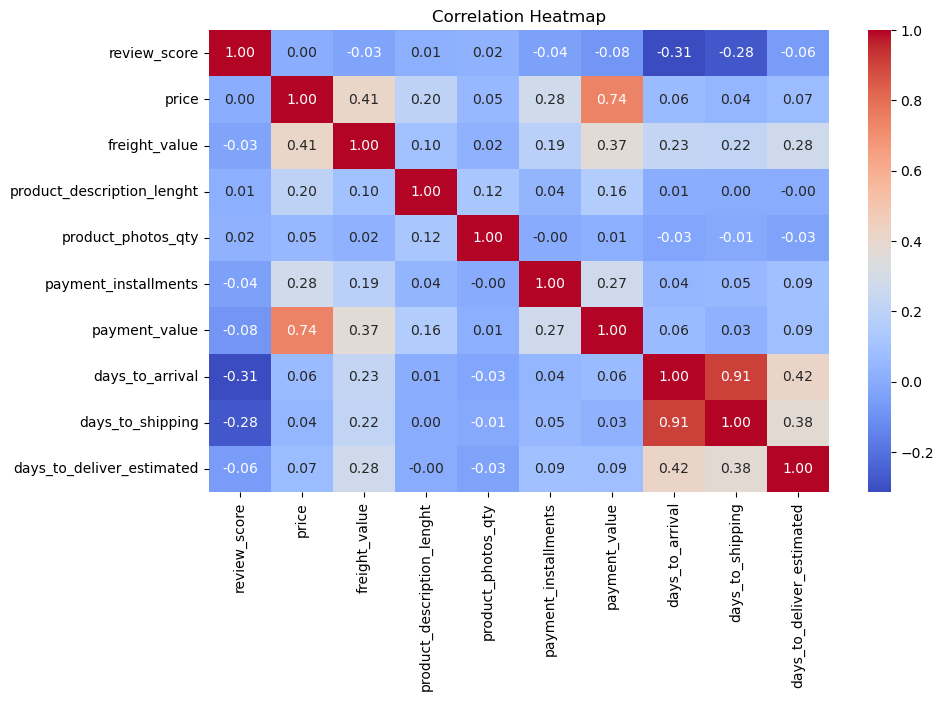

In [30]:
# Excluding non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Showing Correlation between Numeric Features
plt.figure(figsize=[10, 6])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The heatmap gives insights that include strong positive correlation between `days_to_arrival` and `days_to_shipping`, and a notable relationship between `price` and `payment_value`. Understanding these correlations helps identify relationships and potential multicollinearity issues in the data.


In [31]:
# Dropping columns with high collinearity to reduce redundancy and improve model performance
df.drop(columns=['days_to_shipping','price'],inplace=True)

In [32]:
with pd.option_context('display.max_columns', None):  
    display(df.head(5))

,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,days_to_arrival,days_to_deliver_estimated,seller_carrier_status,carrier_to_customer_status,estimated_date_rating,arrival_date_rating,shipping_date_rating
0,4,21.88,1141.0,1.0,credit_card,2,146.87,8,19,Delayed,On-Time,Neutral,Good,Very Good
1,5,46.48,1002.0,3.0,credit_card,8,335.48,16,24,On-Time,On-Time,Neutral,Neutral,Good
2,5,17.79,955.0,1.0,credit_card,7,157.73,26,24,Delayed,Delayed,Neutral,Poor,Very Good
3,5,23.36,1066.0,1.0,credit_card,1,173.30,14,27,Delayed,On-Time,Poor,Good,Very Good
4,5,22.25,407.0,1.0,credit_card,8,252.25,11,16,On-Time,On-Time,Neutral,Good,Good


## Review Score Categorization

Scores below 4 are labeled 'Not Satisfied', and 4 or above as 'Satisfied', streamlining the analysis of customer satisfaction.


In [33]:
# Converting numerical review scores to categorical satisfaction levels
df['review_score'] = np.where(df['review_score'] < 4, 'Not Satisfied', 'Satisfied')

In [34]:
#Preparing the data for train and test
X = df.drop(columns='review_score')
y = df['review_score']

## Categorical Data Transformation

We first convert select rating categories to an ordered numerical format using custom order rules and label encoding. Following this, we apply one-hot encoding to other categorical variables to prepare our dataset for modeling, removing the first category to avoid dummy variable trap.


In [35]:
from sklearn.preprocessing import LabelEncoder

# Creating a custom order for the labels
custom_order = ['Very Poor', 'Poor', 'Neutral', 'Good', 'Very Good']

# Converting the columns to ordered categories
for column in ['estimated_date_rating', 'shipping_date_rating', 'arrival_date_rating']:
    X[column] = pd.Categorical(X[column], categories=custom_order, ordered=True)

# Encoding the ordered categories
encoder = LabelEncoder()
for column in ['estimated_date_rating', 'shipping_date_rating', 'arrival_date_rating']:
    X[column] = encoder.fit_transform(X[column].cat.codes)

# Print the transformed data and show the first few rows
print(f'******************* Ordered category encoding completed: *******************\n')
print(X[['estimated_date_rating', 'shipping_date_rating', 'arrival_date_rating']].head())


******************* Ordered category encoding completed: *******************

   estimated_date_rating  shipping_date_rating  arrival_date_rating
0                      2                     4                    3
1                      2                     3                    2
2                      2                     4                    1
3                      1                     4                    3
4                      2                     3                    3


In [36]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Selecting only the object (categorical) columns from X
categorical_columns = X.select_dtypes(include=['object']).columns

# Fit and transform the selected columns
encoded_features = encoder.fit_transform(X[categorical_columns])

# Creating a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Dropping the original categorical columns from X and concatenate with the encoded features
X = X.drop(categorical_columns, axis=1).join(encoded_df)

# Print the one-hot encoded data and show the first few rows
print(f'******************* Output after One Hot Encoding *******************\n')
print(X.head())

******************* Output after One Hot Encoding *******************

   freight_value  product_description_lenght  product_photos_qty  \
0          21.88                      1141.0                 1.0   
1          46.48                      1002.0                 3.0   
2          17.79                       955.0                 1.0   
3          23.36                      1066.0                 1.0   
4          22.25                       407.0                 1.0   

   payment_installments  payment_value  days_to_arrival  \
0                     2         146.87                8   
1                     8         335.48               16   
2                     7         157.73               26   
3                     1         173.30               14   
4                     8         252.25               11   

   days_to_deliver_estimated  estimated_date_rating  arrival_date_rating  \
0                         19                      2                    3   
1            

In [37]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

In [38]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# importances = model.feature_importances_

# # Selecting the top k features based on importance
# k = 9
# indices = np.argsort(importances)[::-1][:k]

# X_train_fs = X_train.iloc[:, indices]
# X_test_fs = X_test.iloc[:, indices]

In [39]:
#Performing RandomForestClassifier to identify important features
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

In [40]:
#Performing KFold Validation
from sklearn.model_selection import cross_val_score, KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)
feature_importances = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_train_kf, y_train_kf)
    feature_importances.append(model.feature_importances_)

avg_importances = np.mean(feature_importances, axis=0)

print(f'Average Feature Importances: {avg_importances}')

Average Feature Importances: [0.17021913 0.17409108 0.05408911 0.05577268 0.18528831 0.10825751
 0.11307236 0.01950375 0.0273804  0.02674165 0.01326098 0.00276307
 0.00550547 0.00793068 0.03612381]


In [41]:
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Determine the median value of the feature importances as the threshold
median_importance = np.median(avg_importances)
print(f'Median importance threshold: {median_importance}')

# Initialize SelectFromModel with the previously trained model and the median importance as the threshold
selector = SelectFromModel(model, threshold=median_importance)
print('Feature selector initialized.')

# Fit the selector to the training data and transform both training and test sets
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

# Print the shapes of the original and reduced feature sets
print(f'Original training features shape: {X_train.shape}')
print(f'Reduced training features shape: {X_train_fs.shape}')
print(f'Original test features shape: {X_test.shape}')
print(f'Reduced test features shape: {X_test_fs.shape}')

Median importance threshold: 0.03612381446902188
Feature selector initialized.
Original training features shape: (90051, 15)
Reduced training features shape: (90051, 7)
Original test features shape: (22513, 15)
Reduced test features shape: (22513, 7)


## Feature Scaling 

We shall apply `StandardScaler` to normalize feature distributions, ensuring consistent model training across all variables. To address class imbalances evident in our dataset, we use techniques like SMOTE and RandomOverSampler, enhancing model fairness and accuracy by balancing class representation.


In [42]:
from sklearn.preprocessing import StandardScaler

# Assuming you know the selected feature names or retrieve them from X_train.columns after feature selection
selected_features = X_train.columns[selector.get_support()]

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_fs)
X_test_scaled = sc.transform(X_test_fs)

# Creating a new DataFrame with correct column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

In [43]:
# from imblearn.over_sampling import ADASYN

# # Initialize the ADASYN sampler
# adasyn = ADASYN(random_state=42)

# # Resample the training data
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)


In [44]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Performing oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [45]:
class_distribution = round((y_train.value_counts() / y_train.shape[0]) * 100, 2)
print(f'*************** Class Distribution in Training Data: ***************\n')
print(class_distribution.to_string(header=False))

*************** Class Distribution in Training Data: ***************

Satisfied        76.98
Not Satisfied    23.02


In [48]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

# Initializing RandomOverSampler with a fixed random state for reproducibility
ros = RandomOverSampler(random_state=42)
# Resampling the training data to address class imbalance
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# Print the new shapes of the resampled datasets to verify balancing
print(f'Resampled training features shape: {X_train_resampled.shape}')
print(f'Resampled training labels shape: {y_train_resampled.shape}')

Resampled training features shape: (138650, 7)
Resampled training labels shape: (138650,)


## Machine Learning Model Implementation

### Overview
This section is dedicated to building and evaluating machine learning models based on the preprocessed and balanced dataset. We will explore various algorithms to find the one that best fits our data characteristics and prediction goals.

**************Evaluation on Training Set:**************
               precision    recall  f1-score   support

Not Satisfied       0.64      0.50      0.56     69325
    Satisfied       0.59      0.72      0.65     69325

     accuracy                           0.61    138650
    macro avg       0.62      0.61      0.61    138650
 weighted avg       0.62      0.61      0.61    138650

**************Evaluation on Testing Set:**************
               precision    recall  f1-score   support

Not Satisfied       0.35      0.50      0.41      5181
    Satisfied       0.83      0.72      0.77     17332

     accuracy                           0.67     22513
    macro avg       0.59      0.61      0.59     22513
 weighted avg       0.72      0.67      0.69     22513

Training Accuracy: 0.611345113595384
Testing Accuracy: 0.670545906809399


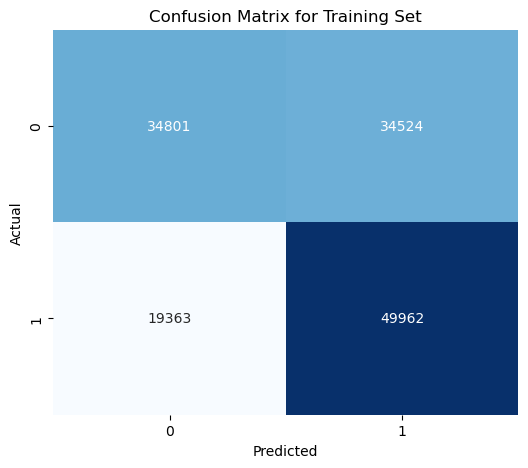

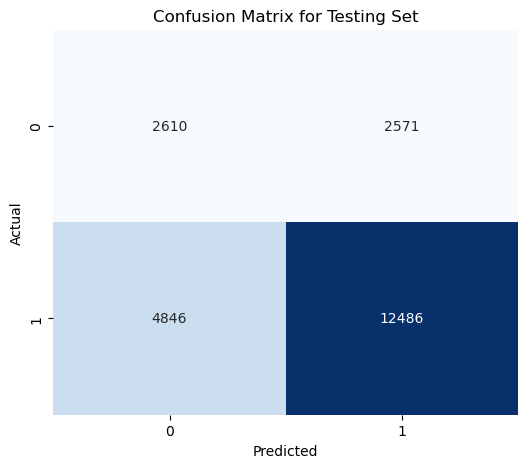

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Filter warnings of convergence.
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize and train the logistic regression model.
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for better convergence
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions for evaluation
train_preds = log_reg.predict(X_train_resampled)
test_preds = log_reg.predict(X_test_scaled)

# Classification reports
print('**************Evaluation on Training Set:**************')
print(classification_report(y_train_resampled, train_preds))
print('**************Evaluation on Testing Set:**************')
print(classification_report(y_test, test_preds))

# Accuracy scores
print("Training Accuracy:", accuracy_score(y_train_resampled, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

# Function to plot confusion matrix
def plot_conf_matrix(actual, predicted, title):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plotting confusion matrices
plot_conf_matrix(y_train_resampled, train_preds, 'Confusion Matrix for Training Set')
plot_conf_matrix(y_test, test_preds, 'Confusion Matrix for Testing Set')


**************Evaluation on Training Set:**************
               precision    recall  f1-score   support

Not Satisfied       0.64      0.53      0.58     69325
    Satisfied       0.60      0.71      0.65     69325

     accuracy                           0.62    138650
    macro avg       0.62      0.62      0.62    138650
 weighted avg       0.62      0.62      0.62    138650

**************Evaluation on Testing Set:**************
               precision    recall  f1-score   support

Not Satisfied       0.35      0.52      0.41      5181
    Satisfied       0.83      0.71      0.76     17332

     accuracy                           0.66     22513
    macro avg       0.59      0.61      0.59     22513
 weighted avg       0.72      0.66      0.68     22513

Training Accuracy: 0.6183699963937973
Testing Accuracy: 0.6634833207480123


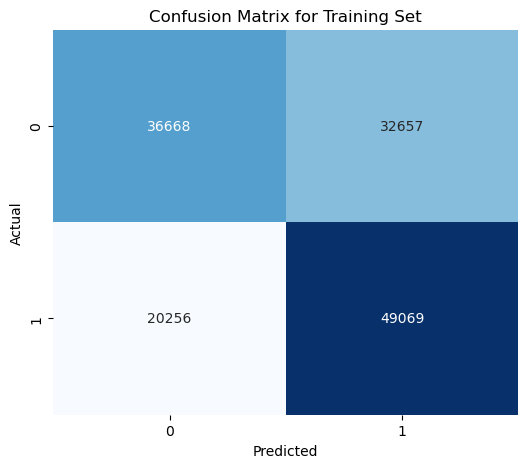

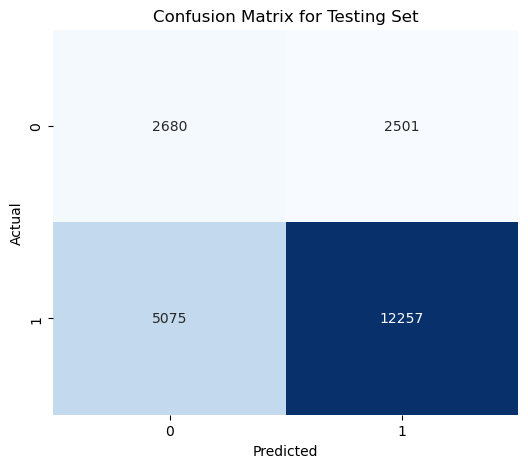

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize DecisionTreeClassifier with example hyperparameters
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dtc.fit(X_train_resampled, y_train_resampled)

# Predict on training and testing sets
train_preds = dtc.predict(X_train_resampled)
test_preds = dtc.predict(X_test_scaled)

# Classification reports
print('**************Evaluation on Training Set:**************')
print(classification_report(y_train_resampled, train_preds))
print('**************Evaluation on Testing Set:**************')
print(classification_report(y_test, test_preds))

# Accuracy scores
print("Training Accuracy:", accuracy_score(y_train_resampled, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

# Function to plot confusion matrix
def plot_conf_matrix(actual, predicted, title):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plotting confusion matrices
plot_conf_matrix(y_train_resampled, train_preds, "Confusion Matrix for Training Set")
plot_conf_matrix(y_test, test_preds, "Confusion Matrix for Testing Set")


**************Evaluation on Training Set:**************
               precision    recall  f1-score   support

Not Satisfied       0.76      0.52      0.62     69325
    Satisfied       0.64      0.83      0.72     69325

     accuracy                           0.68    138650
    macro avg       0.70      0.68      0.67    138650
 weighted avg       0.70      0.68      0.67    138650

**************Evaluation on Testing Set:**************
               precision    recall  f1-score   support

Not Satisfied       0.43      0.46      0.45      5181
    Satisfied       0.84      0.81      0.83     17332

     accuracy                           0.73     22513
    macro avg       0.63      0.64      0.64     22513
 weighted avg       0.74      0.73      0.74     22513

Training Accuracy: 0.678918139199423
Testing Accuracy: 0.7340647625816195


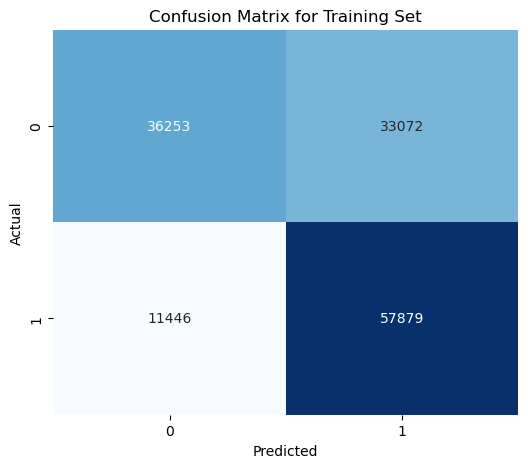

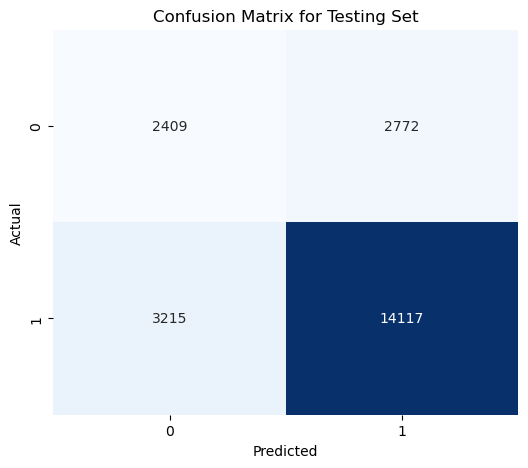

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize RandomForestClassifier with example hyperparameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rfc.fit(X_train_resampled, y_train_resampled)

# Predict on training and testing sets
train_preds = rfc.predict(X_train_resampled)
test_preds = rfc.predict(X_test_scaled)

# Classification reports
print('**************Evaluation on Training Set:**************')
print(classification_report(y_train_resampled, train_preds))
print('**************Evaluation on Testing Set:**************')
print(classification_report(y_test, test_preds))

# Accuracy scores
print("Training Accuracy:", accuracy_score(y_train_resampled, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

# Function to plot confusion matrix
def plot_conf_matrix(actual, predicted, title):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plotting confusion matrices
plot_conf_matrix(y_train_resampled, train_preds, "Confusion Matrix for Training Set")
plot_conf_matrix(y_test, test_preds, "Confusion Matrix for Testing Set")

**************Evaluation on Training Set:**************
              precision    recall  f1-score   support

           0       0.79      0.63      0.70     69325
           1       0.69      0.84      0.76     69325

    accuracy                           0.73    138650
   macro avg       0.74      0.73      0.73    138650
weighted avg       0.74      0.73      0.73    138650

**************Evaluation on Testing Set:**************
              precision    recall  f1-score   support

           0       0.43      0.51      0.47      5181
           1       0.85      0.80      0.82     17332

    accuracy                           0.73     22513
   macro avg       0.64      0.66      0.65     22513
weighted avg       0.75      0.73      0.74     22513

Training Accuracy: 0.7331698521456906
Testing Accuracy: 0.7343756940434416


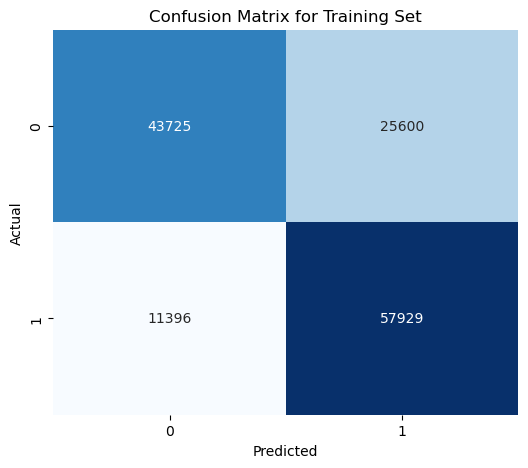

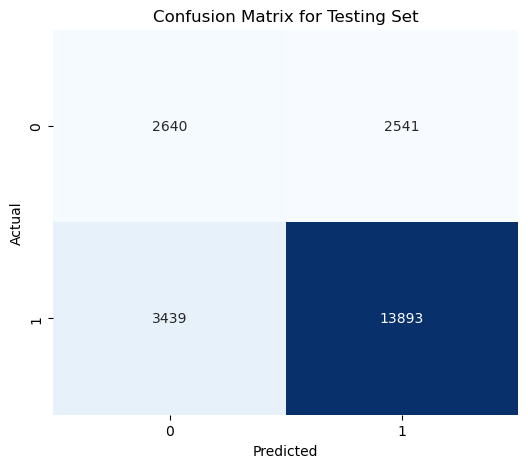

In [53]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Initialize Label Encoder
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.transform(y_test)  # Note: Use transform not fit_transform on test data

# Initialize XGBClassifier
xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Updated to handle deprecation

# Train the model
xg.fit(X_train_resampled, y_train_xg)

# Predict on training and testing datasets
train_preds = xg.predict(X_train_resampled)
test_preds = xg.predict(X_test_scaled)

# Print classification reports
print('**************Evaluation on Training Set:**************')
print(classification_report(y_train_xg, train_preds))
print('**************Evaluation on Testing Set:**************')
print(classification_report(y_test_xg, test_preds))

# Print accuracy scores
print("Training Accuracy:", accuracy_score(y_train_xg, train_preds))
print("Testing Accuracy:", accuracy_score(y_test_xg, test_preds))

# Function to plot confusion matrix
def plot_conf_matrix(actual, predicted, title):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plotting confusion matrices
plot_conf_matrix(y_train_xg, train_preds, "Confusion Matrix for Training Set")
plot_conf_matrix(y_test_xg, test_preds, "Confusion Matrix for Testing Set")


## Hyperparameter Tuning

Given its robust performance and flexibility, XGBoost has been selected as the most optimized model for our dataset. We will now be working on hyperparameter Tuning

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=50; total time=   0.4s
[CV] END lear

[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=

[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200; total time=   0.8s
[CV] END learning_ra

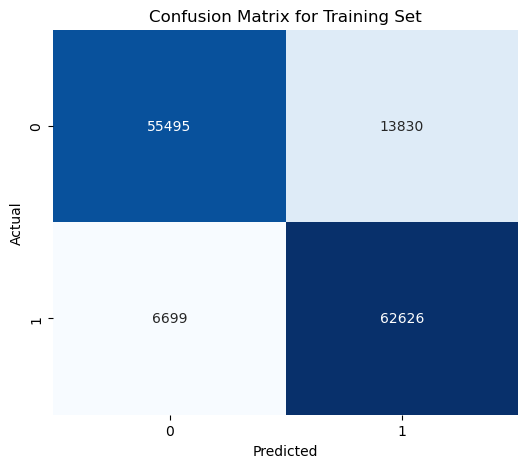

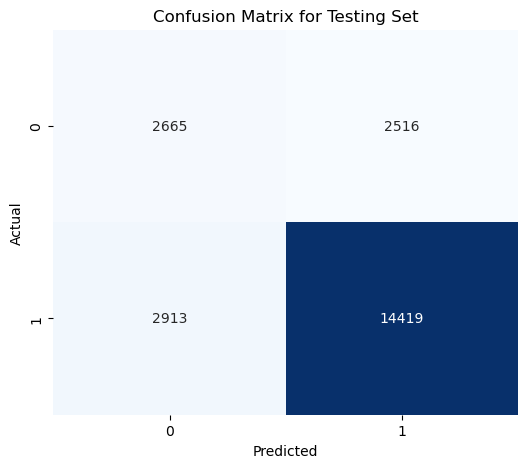

In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler


# Initialize Label Encoder
le = LabelEncoder()

# Encode labels
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.transform(y_test)  # Use transform here to avoid data leakage

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

# Initialize the XGBClassifier with regularization parameters
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', reg_alpha=0.1, reg_lambda=0.1)

# Set up GridSearchCV with the updated model
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_encoded)  # use encoded labels

# Best model
best_xg_model = grid_search.best_estimator_

# Predictions
train_preds = best_xg_model.predict(X_train_resampled)
test_preds = best_xg_model.predict(X_test_scaled)

# Evaluation Reports
print("Best Parameters:", grid_search.best_params_)
print('**************Evaluation on Training Set:**************')
print(classification_report(y_train_encoded, train_preds))
print("Training Accuracy:", accuracy_score(y_train_encoded, train_preds))
print('**************Evaluation on Testing Set:**************')
print(classification_report(y_test_encoded, test_preds))
print("Testing Accuracy:", accuracy_score(y_test_encoded, test_preds))

# Function to plot confusion matrix
def plot_conf_matrix(actual, predicted, title):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plotting confusion matrices
plot_conf_matrix(y_train_encoded, train_preds, "Confusion Matrix for Training Set")
plot_conf_matrix(y_test_encoded, test_preds, "Confusion Matrix for Testing Set")
